In [ ]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [2]:
train_data_path = '/content/drive/MyDrive/GrowthLink/fraudTrain.csv'
#load and display data
df_train = pd.read_csv(train_data_path)
print("First 5 rows of the training dataset:")
df_train.head()

First 5 rows of the training dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
print(f"Dataset shape: {df_train.shape}")

print("\nDataset Info:")
df_train.info()
#check for any missing values
print("\nMissing values per column:")
print(df_train.isnull().sum())

Dataset shape: (1296675, 23)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    12966

Class Distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.5789%


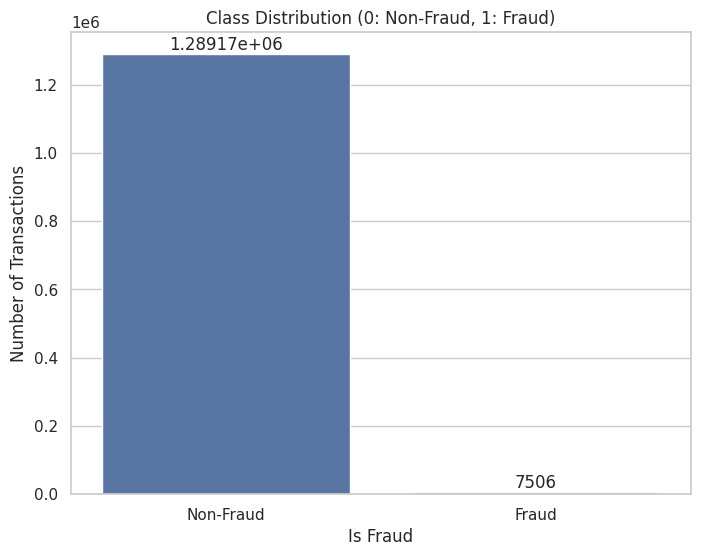

In [4]:
# Calculate class distribution
class_counts = df_train['is_fraud'].value_counts()
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100

print("Class Distribution:")
print(class_counts)
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.4f}%")

# plot
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df_train)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
# labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Transaction Amount Statistics:
count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64


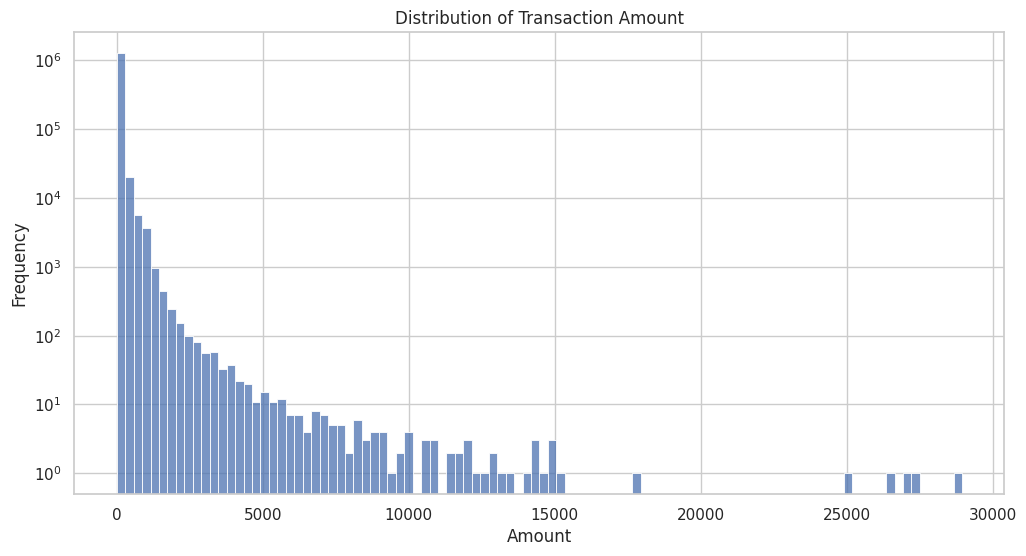

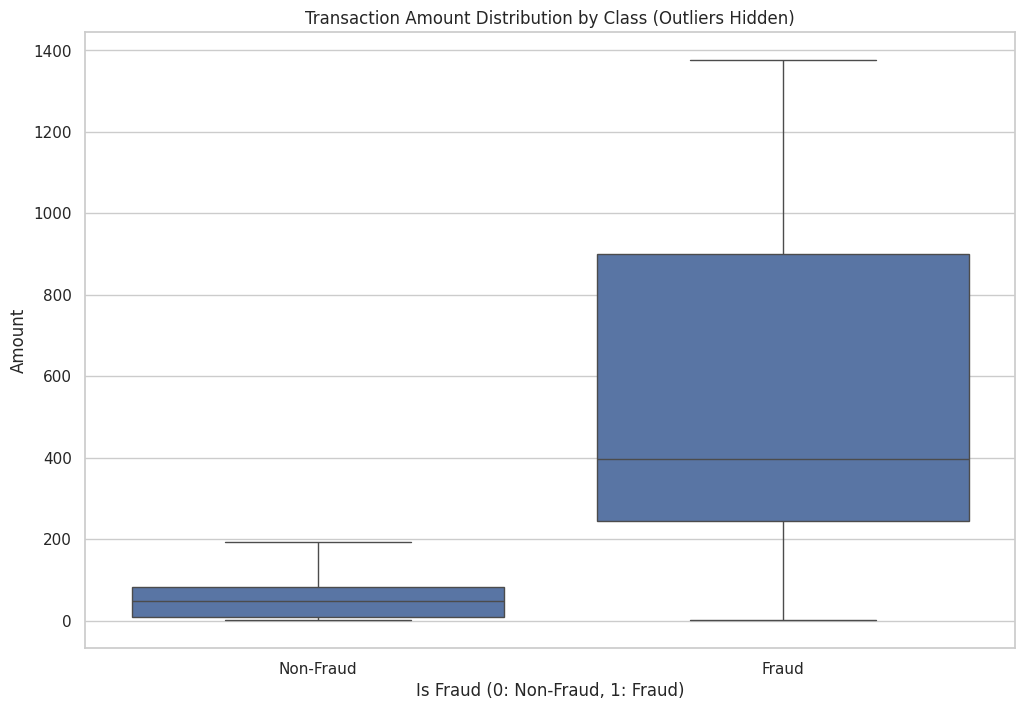


Amount Statistics for Non-Fraudulent Transactions:
count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

Amount Statistics for Fraudulent Transactions:
count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64


In [5]:
# transaction amlunt statistics
print("Transaction Amount Statistics:")
print(df_train['amt'].describe())

# plot
plt.figure(figsize=(12, 6))
sns.histplot(df_train['amt'], bins=100, kde=False)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=df_train, showfliers=False)
plt.title('Transaction Amount Distribution by Class (Outliers Hidden)')
plt.xlabel('Is Fraud (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# comapring fraud and non-fraud
print("\nAmount Statistics for Non-Fraudulent Transactions:")
print(df_train[df_train['is_fraud'] == 0]['amt'].describe())

print("\nAmount Statistics for Fraudulent Transactions:")
print(df_train[df_train['is_fraud'] == 1]['amt'].describe())

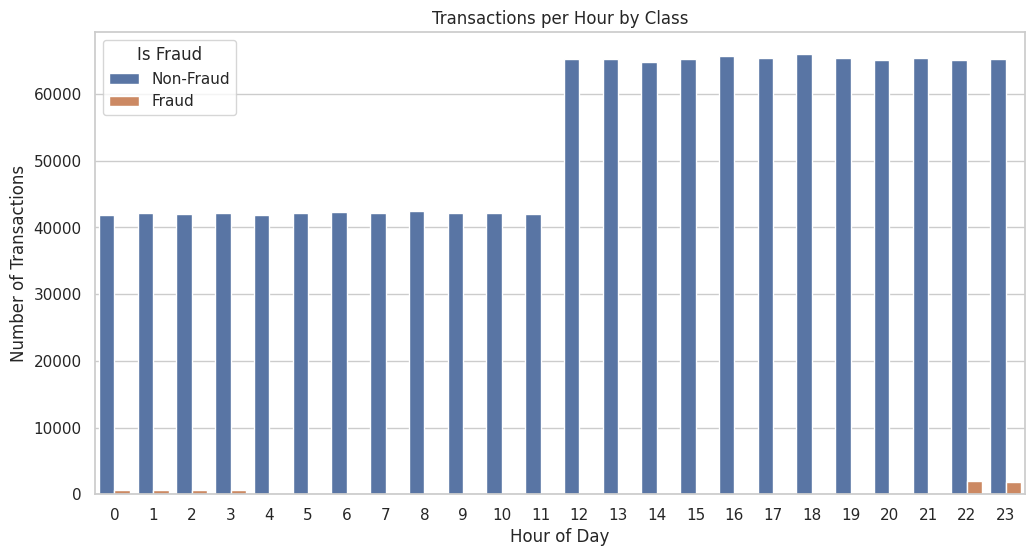

In [6]:

df_train['trans_datetime'] = pd.to_datetime(df_train['trans_date_trans_time'])

# Extract time features
df_train['trans_hour'] = df_train['trans_datetime'].dt.hour
df_train['trans_day_of_week'] = df_train['trans_datetime'].dt.dayofweek # Monday=0, Sunday=6
df_train['trans_month'] = df_train['trans_datetime'].dt.month


plt.figure(figsize=(12, 6))
sns.countplot(x='trans_hour', data=df_train, hue='is_fraud')
plt.title('Transactions per Hour by Class')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


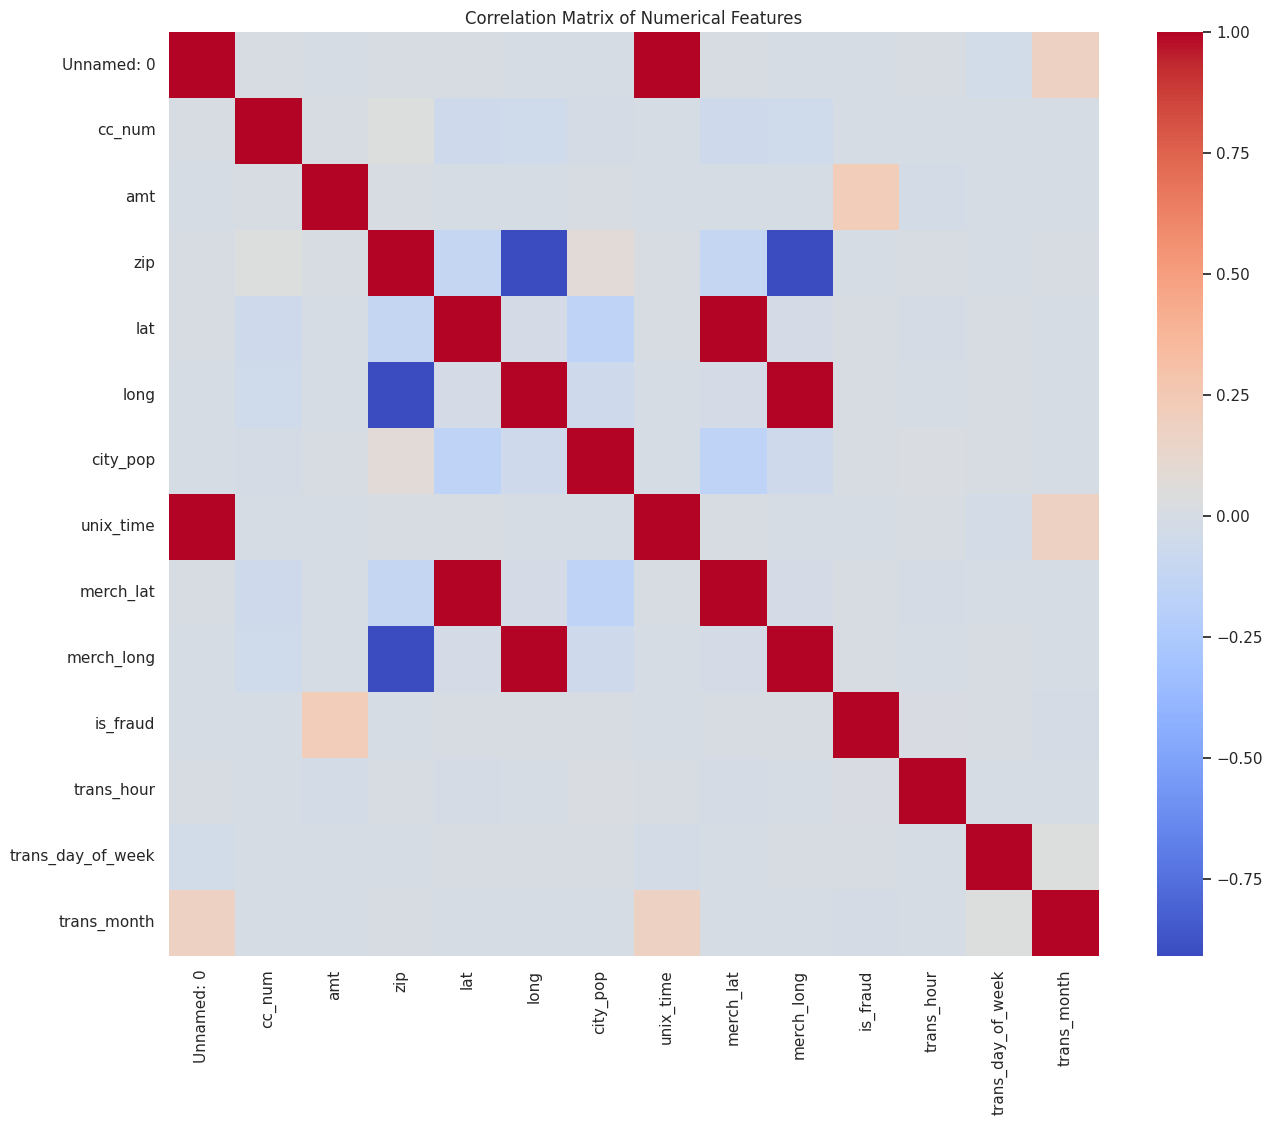


Correlation with 'is_fraud':
is_fraud             1.000000
amt                  0.219404
trans_hour           0.013799
city_pop             0.002136
lat                  0.001894
merch_lat            0.001741
trans_day_of_week    0.001739
merch_long           0.001721
long                 0.001721
cc_num              -0.000981
zip                 -0.002162
Unnamed: 0          -0.004767
unix_time           -0.005078
trans_month         -0.012409
Name: is_fraud, dtype: float64


In [7]:
# Select numerical features for correlation analysis
# Note: We might need to encode categoricals first for a full picture, but let's start with existing numericals
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df_train[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f") # Annotations off for clarity due to many features
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Show correlations with the target variable 'is_fraud'
print("\nCorrelation with 'is_fraud':")
print(correlation_matrix['is_fraud'].sort_values(ascending=False))

In [11]:
# ✅ Preprocessing Pipeline for Credit Card Fraud Detection

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

def handle_missing_values(df):
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

def engineer_time_features(df):
    df['trans_datetime'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
    df['trans_hour'] = df['trans_datetime'].dt.hour
    df['trans_day_of_week'] = df['trans_datetime'].dt.dayofweek
    df['trans_month'] = df['trans_datetime'].dt.month
    df['is_weekend'] = df['trans_day_of_week'].isin([5, 6]).astype(int)
    df['is_night'] = df['trans_hour'].isin(list(range(0, 6)) + list(range(22, 24))).astype(int)
    df['dob_dt'] = pd.to_datetime(df['dob'], errors='coerce')
    df['age'] = ((df['trans_datetime'] - df['dob_dt']).dt.days // 365).fillna(0).astype(int)
    df.drop(['trans_date_trans_time', 'trans_datetime', 'dob', 'dob_dt'], axis=1, inplace=True)
    return df

def engineer_user_features(df):
    user_col = 'cc_num'
    user_trans_count_map = df[user_col].value_counts().to_dict()
    df['user_trans_count'] = df[user_col].map(user_trans_count_map).fillna(0)
    user_avg_amt_map = df.groupby(user_col)['amt'].mean().to_dict()
    df['user_avg_amt'] = df[user_col].map(user_avg_amt_map).fillna(0)
    df['amt_vs_avg'] = (df['amt'] / df['user_avg_amt']).replace([np.inf, -np.inf], 1).fillna(1)
    df = df.sort_values(by=[user_col, 'unix_time'])
    df['time_since_last_trans'] = df.groupby(user_col)['unix_time'].diff().fillna(0)
    return df.reset_index(drop=True)

def engineer_merchant_features(df):
    merchant_col = 'merchant'
    merchant_fraud_rate = df.groupby(merchant_col)['is_fraud'].mean().to_dict()
    df['merchant_fraud_rate'] = df[merchant_col].map(merchant_fraud_rate).fillna(0)
    merchant_trans_count = df[merchant_col].value_counts().to_dict()
    df['merchant_transaction_count'] = df[merchant_col].map(merchant_trans_count).fillna(0)
    return df

def engineer_geo_features(df):
    def haversine(lat1, lon1, lat2, lon2):
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
        c = 2 * np.arcsin(np.sqrt(a))
        km = 6371 * c
        return km

    df['distance_from_home'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])
    return df

def encode_and_scale_features(df, scaler=None, fit_scaler=True):
    ohe_cols = ['gender', 'category']
    ohe_cols = [col for col in ohe_cols if col in df.columns]

    if ohe_cols:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        ohe_df = pd.DataFrame(ohe.fit_transform(df[ohe_cols].astype(str)),
                              columns=ohe.get_feature_names_out(ohe_cols),
                              index=df.index)
        df = pd.concat([df.drop(columns=ohe_cols), ohe_df], axis=1)

    label_cols = ['merchant', 'city', 'state', 'job', 'zip']
    for col in label_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

    drop_cols = ['first', 'last', 'street', 'trans_num']
    df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

    num_cols = df.select_dtypes(include='number').columns.tolist()
    for col in ['is_fraud', 'cc_num']:
        if col in num_cols:
            num_cols.remove(col)

    if fit_scaler:
        scaler = StandardScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])
        return df, scaler
    else:
        df[num_cols] = scaler.transform(df[num_cols])
        return df

def preprocess_full(df, scaler=None, fit_scaler=True):
    df = handle_missing_values(df)
    df = engineer_time_features(df)
    df = engineer_user_features(df)
    df = engineer_merchant_features(df)
    df = engineer_geo_features(df)
    if fit_scaler:
        df, scaler = encode_and_scale_features(df, fit_scaler=True)
        return df, scaler
    else:
        df = encode_and_scale_features(df, scaler=scaler, fit_scaler=False)
        return df


In [12]:

# Load the train and test datasets
train_data_path = '/content/drive/MyDrive/GrowthLink/fraudTrain.csv'
test_data_path = '/content/drive/MyDrive/GrowthLink/fraudTest.csv'

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("✅ Loaded train and test datasets")
print("Train sample:")
display(df_train.head())
print("Test sample:")
display(df_test.head())

# Preprocess train data and fit the scaler
processed_train, scaler = preprocess_full(df_train, fit_scaler=True)

# Preprocess test data using the same scaler
processed_test = preprocess_full(df_test, scaler=scaler, fit_scaler=False)

print("✅ Preprocessing complete.")
print("Processed train sample:")
display(processed_train.head())
print("Processed test sample:")
display(processed_test.head())
# Save preprocessed datasets to CSV in Google Drive
processed_train.to_csv('/content/drive/MyDrive/GrowthLink/processed_fraudTrain.csv', index=False)
processed_test.to_csv('/content/drive/MyDrive/GrowthLink/processed_fraudTest.csv', index=False)

print("✅ Processed datasets saved to Google Drive:")
print("- processed_fraudTrain.csv")
print("- processed_fraudTest.csv")


✅ Loaded train and test datasets
Train sample:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Test sample:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


✅ Preprocessing complete.
Processed train sample:


,Unnamed: 0,cc_num,merchant,amt,city,state,zip,lat,long,city_pop,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-1.729333,60416207185,-0.248112,-0.393479,-0.670005,1.627434,1.284673,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,-0.323894,-0.309027,4.414613,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573
1,-1.724772,60416207185,-1.492191,-0.108604,-0.670005,1.627434,1.284673,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,-0.323894,-0.309027,-0.226520,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573
2,-1.724767,60416207185,0.279378,0.073162,-0.670005,1.627434,1.284673,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,-0.323894,-0.309027,-0.226520,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573
3,-1.724350,60416207185,-1.079157,-0.221818,-0.670005,1.627434,1.284673,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,-0.323894,3.235962,-0.226520,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573
4,-1.724283,60416207185,-1.502144,-0.269287,-0.670005,1.627434,1.284673,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,3.087430,-0.309027,-0.226520,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573


Processed test sample:


,Unnamed: 0,cc_num,merchant,amt,city,state,zip,lat,long,city_pop,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-1.731630,60416207185,0.095254,0.338762,-0.724143,1.557655,1.101439,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,3.087430,-0.309027,-0.22652,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573
1,-1.730070,60416207185,-0.586501,0.050955,-0.724143,1.557655,1.101439,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,-0.323894,-0.309027,-0.22652,3.908790,-0.274337,-0.28521,-0.314443,-0.179573
2,-1.723909,60416207185,-1.193612,-0.031819,-0.724143,1.557655,1.101439,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,-0.323894,-0.309027,-0.22652,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573
3,-1.720426,60416207185,0.149994,0.108467,-0.724143,1.557655,1.101439,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,-0.323894,3.235962,-0.22652,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573
4,-1.711492,60416207185,0.194781,0.484474,-0.724143,1.557655,1.101439,0.880092,-1.356928,-0.288715,...,-0.324654,-0.266323,-0.323894,-0.309027,-0.22652,-0.255834,3.645157,-0.28521,-0.314443,-0.179573


✅ Processed datasets saved to Google Drive:
- processed_fraudTrain.csv
- processed_fraudTest.csv


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix: [[553574      0]
 [  2145      0]]
ROC-AUC: 0.5

Random Forest Evaluation:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.06      0.70      0.12      2145

    accuracy                           0.96    555719
   macro avg       0.53      0.83      0.55    555719
weighted avg       1.00      0.96      0.98    555719

Confusion Matrix: [[531664  21910]
 [   637   1508]]
ROC-AUC: 0.8317255660216132

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.77      0.70      2145

    accuracy                           1.00    555719
   macro avg       0.82      0.88      0.85    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix: [[552678    896]
 [   495   1650]]
ROC-AUC: 0.8838060980520706

Feature Importance (Random Forest):
                       feature  importance
3                          amt    0.213049
22                  amt_vs_avg    0.1518

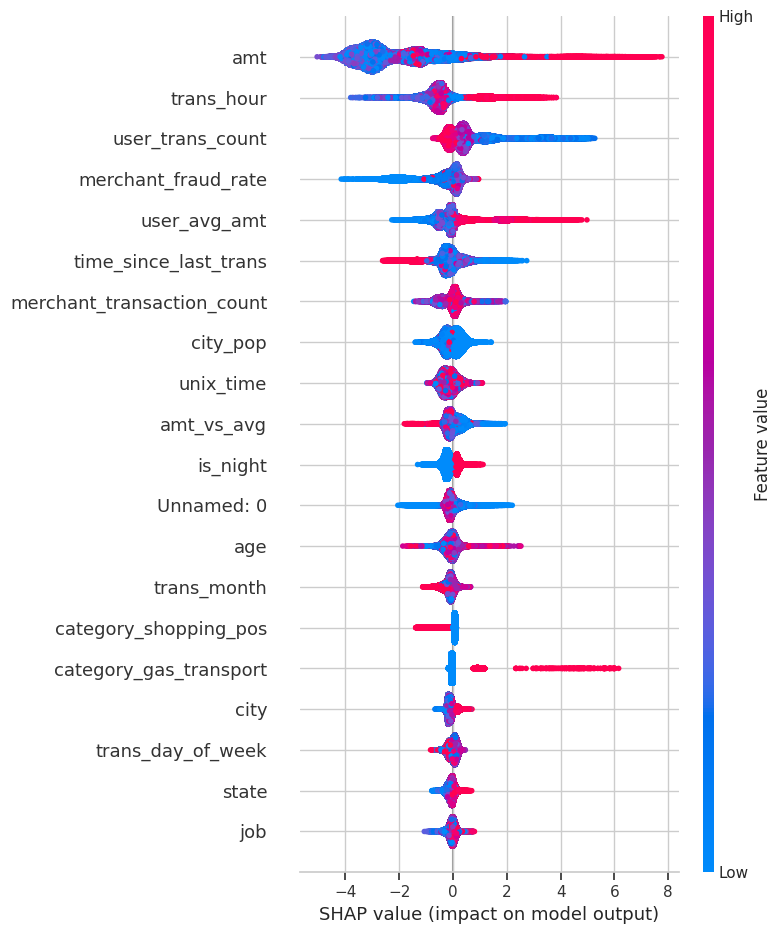

['/content/drive/MyDrive/GrowthLink/xgb_model.pkl']

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
import shap

# Load the training and testing datasets from Google Drive
train_df = pd.read_csv('/content/drive/MyDrive/GrowthLink/processed_fraudTrain.csv')
test_df = pd.read_csv('/content/drive/MyDrive/GrowthLink/processed_fraudTest.csv')

# Define feature columns and target variable for the training set
X_train = train_df.drop(columns=['is_fraud'])
y_train = train_df['is_fraud']

# Define feature columns and target variable for the test set
X_test = test_df.drop(columns=['is_fraud'])
y_test = test_df['is_fraud']

# 1. Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 2. Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 3. Train an XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate the models using classification report, confusion matrix, and ROC-AUC score
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_logreg))

print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

print("\nXGBoost Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))

# Feature Importance using Random Forest or XGBoost (for model interpretation)
# Random Forest feature importance
feature_importances_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(feature_importances_rf)

# SHAP values for model explainability (XGBoost)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)



import joblib

# Save models
joblib.dump(logreg, '/content/drive/MyDrive/GrowthLink/logreg_model.pkl')
joblib.dump(rf, '/content/drive/MyDrive/GrowthLink/rf_model.pkl')
joblib.dump(xgb, '/content/drive/MyDrive/GrowthLink/xgb_model.pkl')
